In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Business Problems that we will be addressing is as follows -


- Perform EDA on the data
- Perform data cleanup as required
- Pick the best variable for making a simple linear regression model
- Perform train test split
- Build model using best variable and report the R2
- Make a multiple regression model
     
     o Apply feature selection approaches discussed in the class
     

- Final model should be interpretable

     o What is your understanding of the factors that drive price?

In [496]:
# Importing the Dataset
df= pd.read_csv('AutoData (1).csv')

In [497]:
# Lets check the starting few entries of the dataset
df.tail(25)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
180,-1,toyota starlet,gas,std,four,sedan,rwd,front,104.5,187.8,...,171,mpfi,3.27,3.35,9.2,156,5200,20,24,15690.0
181,-1,toyouta tercel,gas,std,four,wagon,rwd,front,104.5,187.8,...,161,mpfi,3.27,3.35,9.2,156,5200,19,24,15750.0
182,2,vokswagen rabbit,diesel,std,two,sedan,fwd,front,97.3,171.7,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7775.0
183,2,volkswagen 1131 deluxe sedan,gas,std,two,sedan,fwd,front,97.3,171.7,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,7975.0
184,2,volkswagen model 111,diesel,std,four,sedan,fwd,front,97.3,171.7,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7995.0
185,2,volkswagen type 3,gas,std,four,sedan,fwd,front,97.3,171.7,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8195.0
186,2,volkswagen 411 (sw),gas,std,four,sedan,fwd,front,97.3,171.7,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8495.0
187,2,volkswagen super beetle,diesel,turbo,four,sedan,fwd,front,97.3,171.7,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495.0
188,2,volkswagen dasher,gas,std,four,sedan,fwd,front,97.3,171.7,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995.0
189,3,vw dasher,gas,std,two,convertible,fwd,front,94.5,159.3,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595.0


In [498]:
# Checking the Shape of the dataset
df.shape

(205, 25)

In [499]:
# Information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [500]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.83,1.25,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.76,6.02,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.05,12.34,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.91,2.15,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.72,2.44,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.57,520.68,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.91,41.64,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.33,0.27,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.26,0.31,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.14,3.97,7.00,8.60,9.00,9.40,23.00


In [501]:
df.describe(include=['object'])

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [502]:
vehicle_count=df.make.value_counts()
vehicle_count

peugeot 504                        6
toyota corolla                     6
toyota corona                      6
subaru dl                          4
mitsubishi outlander               3
mitsubishi mirage g4               3
toyota mark ii                     3
mitsubishi g4                      3
honda civic                        3
mazda 626                          3
volvo 244dl                        2
nissan rogue                       2
mazda rx-7 gs                      2
honda civic cvcc                   2
mazda rx-4                         2
mazda glc deluxe                   2
bmw x3                             2
saab 99e                           2
subaru                             2
toyota corolla liftback            2
nissan clipper                     2
isuzu D-Max                        2
porsche cayenne                    2
volvo 144ea                        2
audi 100ls                         2
volvo 264gl                        2
honda accord                       2
s

In [503]:
# Splitting and extracting Car company name from make column

df['make'] = df['make'].str.lower().str.split(" ").str[0]


In [504]:
df['make'].value_counts()

toyota         31
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
maxda           2
renault         2
vw              2
vokswagen       1
toyouta         1
mercury         1
porcshce        1
Name: make, dtype: int64

In [505]:
# renaming the values in make to match to the correct make name

old_make = ['toyouta', 'maxda', 'porcshce', 'vokswagen', 'vw']
new_make = ['toyota', 'mazda', 'porsche', 'volkswagen','volkswagen']
df.make = df.make.replace(old_make, new_make)

In [506]:
df['make'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: make, dtype: int64

In [507]:
# Convert Symboling to Categorical from Numeric
df['symboling']= df['symboling'].astype('object')


In [508]:
'''
looking at Highway mpg and city mpg, we can combine it into one column averaging both and
then converting to KM\L
'''
df['avg-mpg'] = (df['highwaympg'] + df['citympg']) / 2

In [509]:
df.drop(columns=['highwaympg', 'citympg'], axis=1, inplace=True)

In [510]:
df['avg-mpg']= (df['avg-mpg']/2.352).round(1)

In [511]:
df.rename(columns={'avg-mpg':'km\L'}, inplace=True)

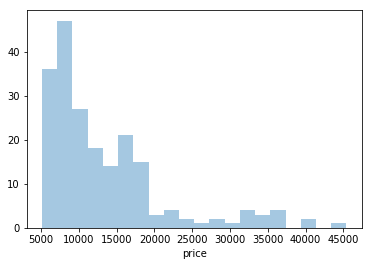

In [512]:
# let us see the distribution of target variable price
sns.distplot(df.price, bins=20, kde= False)

#### From the above plot, we can make out that the price is right skewed and medium would be a better measure for any of our analysis involving price

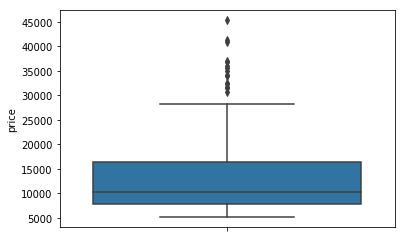

In [513]:
sns.boxplot(df.price, orient="v")

#### Though we see a lot of values above the upper viscor from the above boxplot, but these should not be removed because if we see those values intutively then these are realistic values of car prices.

# Now let us first visualize all Numeric and then cateorical variables to see how they relate to each other as well as our target variable that is price

In [514]:
# creating a new dataframe for all numeric feature
num_df = df.select_dtypes(exclude=object)

In [515]:
num_df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'price', 'km\L'],
      dtype='object')

In [516]:
# lets now visualize 5 features at a time with price to see how they relate to each other as well as price
first_5 = pd.concat([num_df.iloc[:,:5], num_df[['price']]], axis=1)

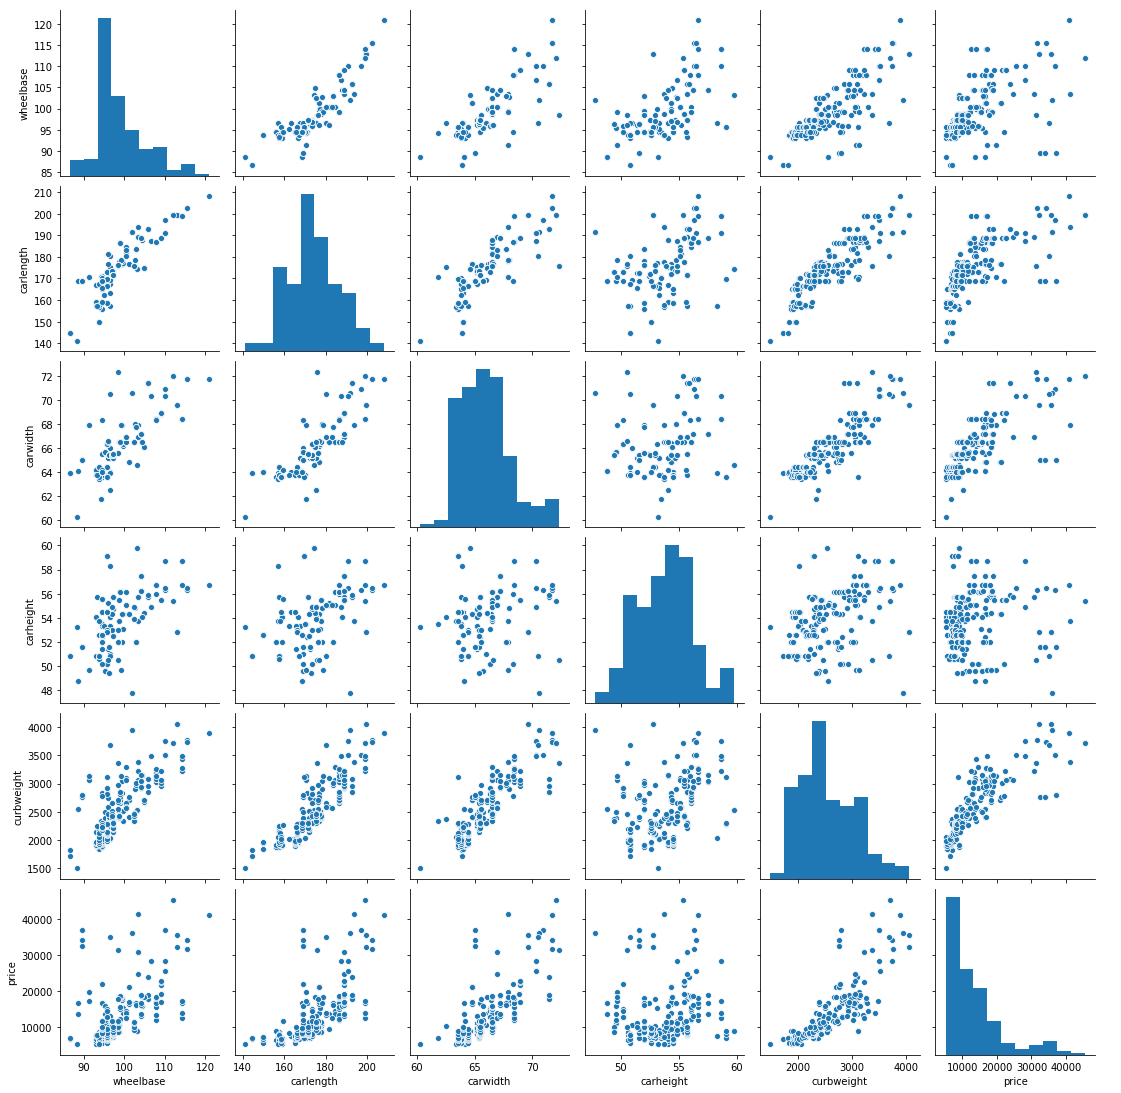

In [517]:
sns.pairplot(first_5)

In [518]:
# lets now visualize next 5 features a with price to see how they relate to each other as well as price
second_5 = pd.concat([num_df.iloc[:,5:10], num_df[['price']]], axis=1)

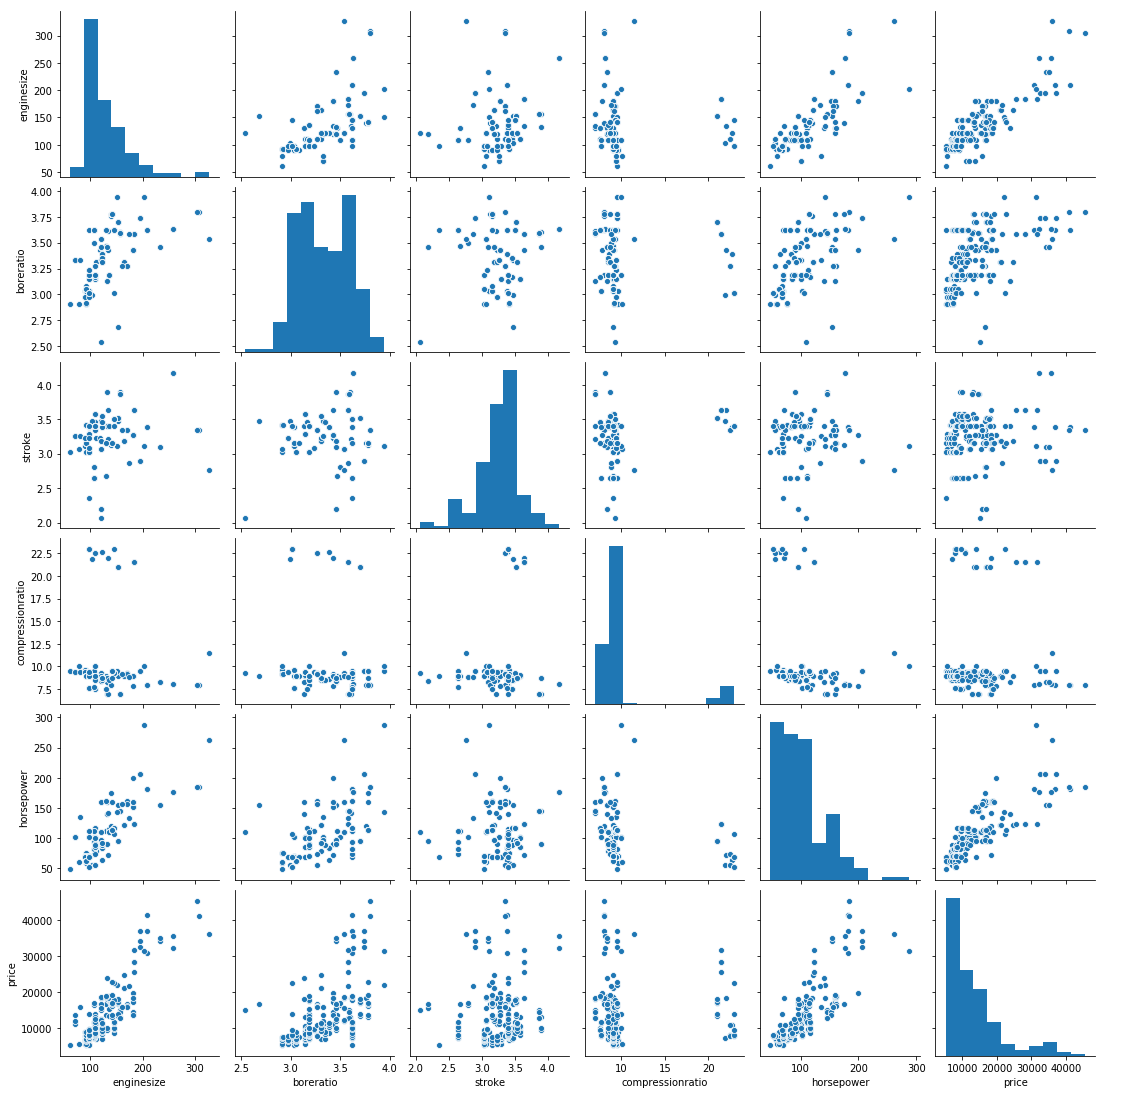

In [519]:
sns.pairplot(second_5)

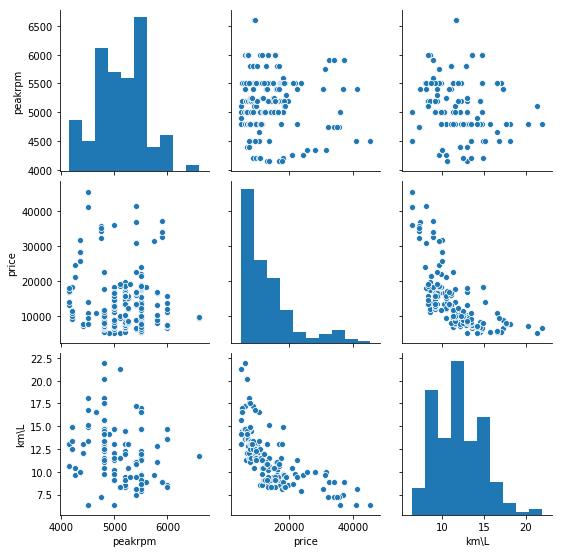

In [520]:
# lets now visualize last of the features left at a time with price to see how they relate to each other as well as price
sns.pairplot(num_df.iloc[:,10:])

#### lot of inference can be drawn from this, the most correlated features to price looks to be - Horsepower,  Highwaympg, citympg, curbweight, engine size, wheel base, car length, car weidth, car height.

# Now let us visualize all Categorical variables to see how they relate to each other as well as our target variable that is price

In [521]:
# get the list of categorical variables

cat_df=df.select_dtypes(include=['object']).columns.tolist()

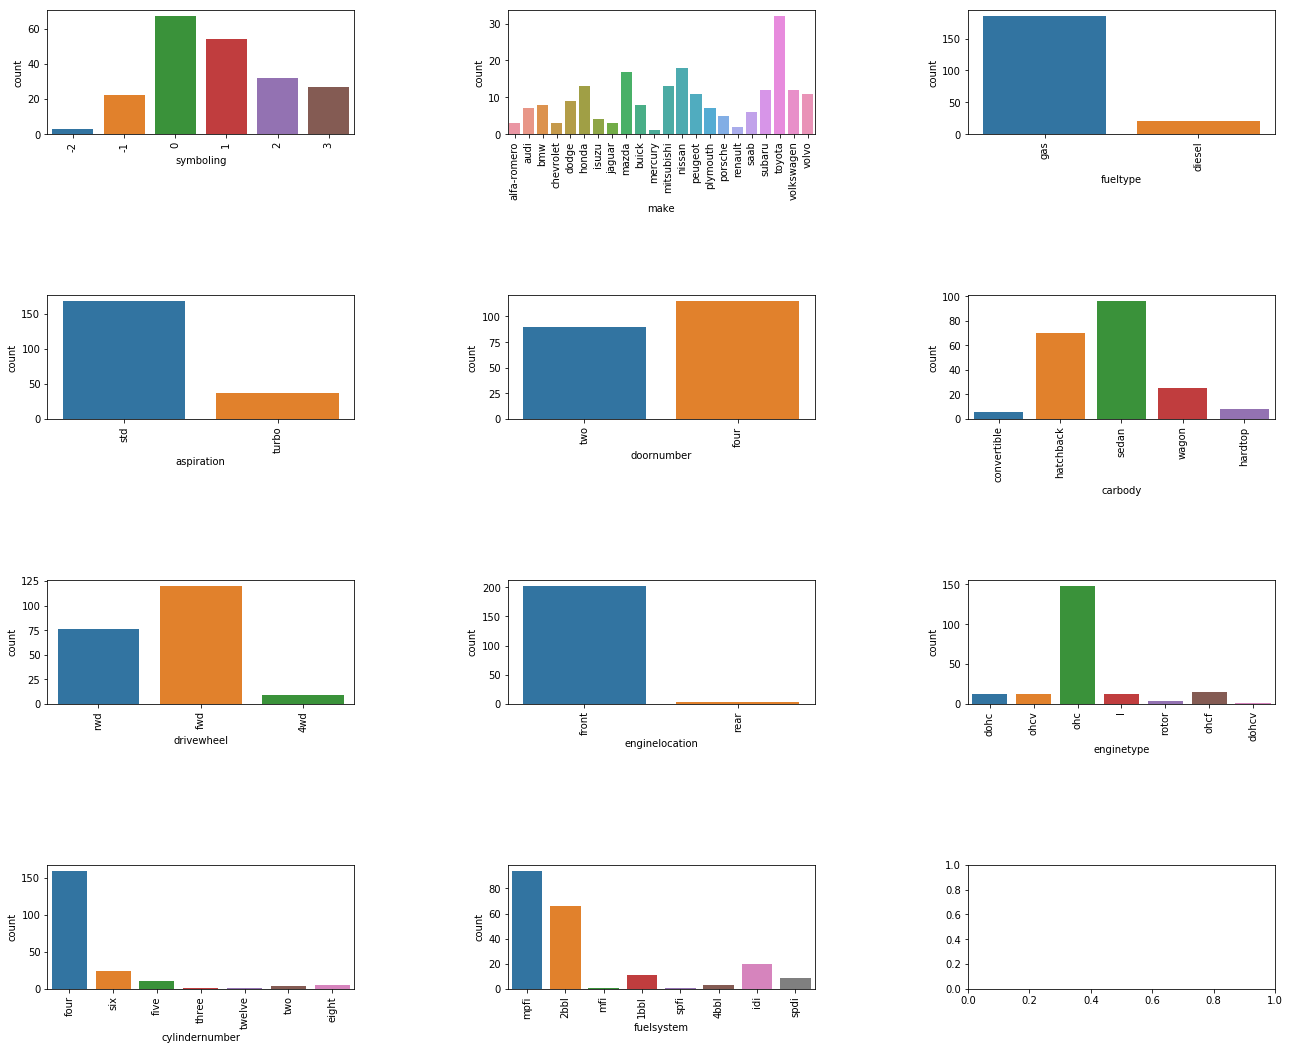

In [522]:
#Visualizing countplot of all Categorical variables

fig, ax = plt.subplots(4,3, figsize=(22, 18))
fig.subplots_adjust(hspace=1.3, wspace=0.5)
for variable, subplot in zip(cat_df, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

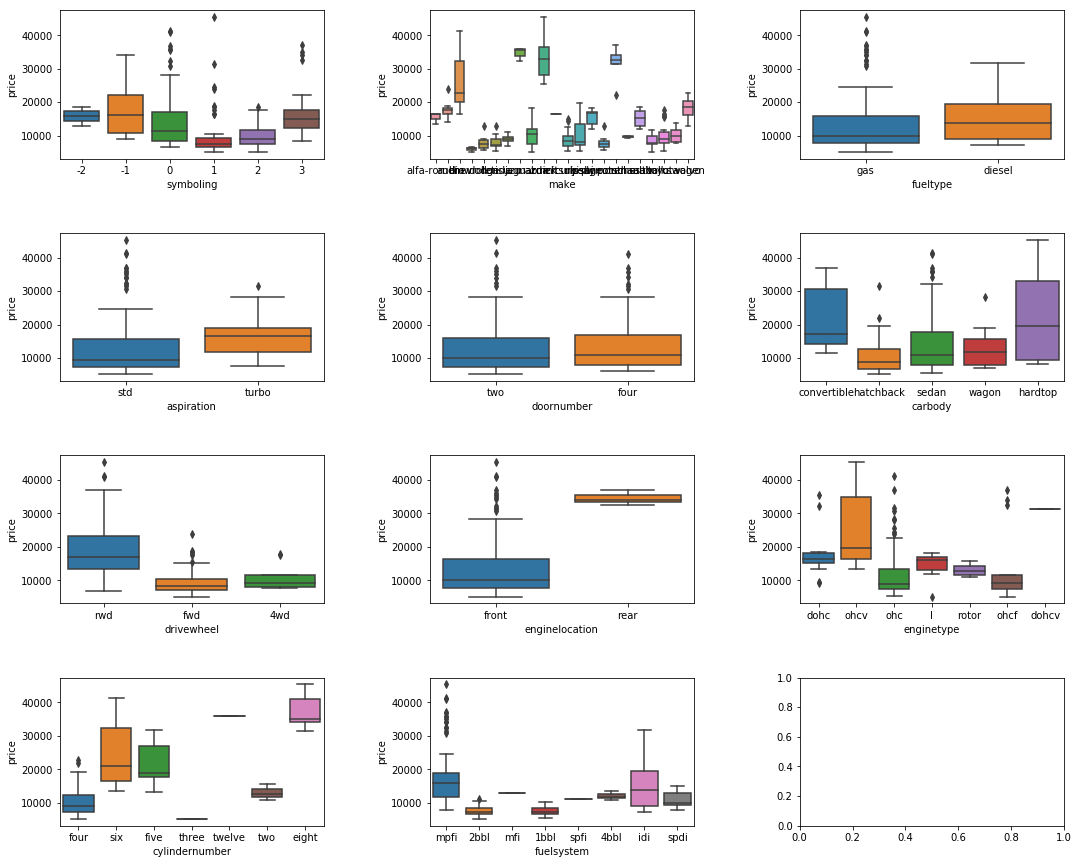

In [523]:
# Now lets visualize these Features with Price

fig, ax = plt.subplots(4, 3, figsize=(18, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for var, subplot in zip(cat_df, ax.flatten()):
    sns.boxplot(x=var, y='price', data=df, ax=subplot)

#### From the Numeric and Categorical plots above, we get the following intution

citympg is correlated highwaympg
curbweight is correlated with enginesize and boreratio
wheelbase is correlated with carlength, carwidth, carheight



##### With Price- 
to some extent price is correlated with wheelbase, carlength and carwidth

price is correlated with horsepower

price is correlated with enginesize and curbweight

Rear Engine Location is correlated with Price

There is little correlation between Diesel Fuel Type, Turbo Aspiration and Price.

DriveWheel_rwd is correlated with price

EngineType dohcv is correlated with price

CarNames bmw, jaguar, buick, porsche are correlated with price

#### General Inference drawn about various features of the dataset is as below
Toyota has most number of vehicles than the 2nd highest Nissan closely followed by Mazda

Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice.

Most preferred body-style is sedan cars around 50% out of total cars.

80% cars are four cylinders based.

Front wheel drive has most number of cars followed by rear wheel and four wheel.

Curb weight of the cars are distributed between 1500 and 4000 approximately

Symboling or the insurance risk rating have the ratings between -3 and 3. There are more cars in the range of 0 and 1.

### From the Exploratory Visualization performed above, we have an intution of the most important factors that could influence prices. Lets see the correlation and then we will try to find the importance of features to predict price

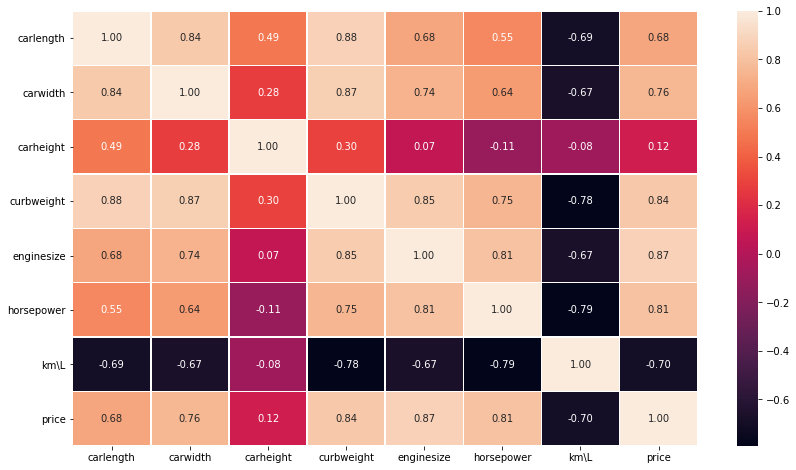

In [524]:
# First lets look at the important numeric features correlation to price and each other as well
plt.figure(figsize=(14,8))
cols = ['carlength','carwidth','carheight','curbweight','enginesize','horsepower','km\L','price']
sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', linewidths=.5)

from above we can further cut down to get the important Numeric features that can help in our analysis to the below though many are correlated-

carlength, carwidth, curbweight, enginesize, horsepower ,km\L

In [525]:
# the Binary categorical feaures that we can include for further analysis are as below and we can convert them to binary-
dummy_var=pd.get_dummies(df[["fueltype","aspiration"]])

In [526]:
df_make_avg_price = df[['make','price']].groupby("make", as_index = False).mean().rename(columns={'price':'make_avg_price'})

In [527]:
df = df.merge(df_make_avg_price, on = 'make')

In [528]:
df['make_category'] = df['make_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

In [529]:
# we will create a new dataframe of all columns we have selected till now-
new_df = df[['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower' ,'km\L']]

In [530]:
# concat the dummy variables to the dataset
new_df= pd.concat([new_df,dummy_var],axis=1)

In [531]:
# dummy variables for Feature with more then 2 levels
dummy_var2= pd.get_dummies(df[['drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'make_category']], drop_first=True)

In [532]:
# concat the dummy variables to the dataset
new_df= pd.concat([new_df,dummy_var2],axis=1)

In [533]:
new_df.head()

,carlength,carwidth,curbweight,enginesize,horsepower,km\L,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,make_category_Luxury,make_category_Mid_Range
0,168.8,64.1,2548,130,111,10.2,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,168.8,64.1,2548,130,111,10.2,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,171.2,65.5,2823,152,154,9.6,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
3,176.6,66.2,2337,109,102,11.5,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
4,176.6,66.4,2824,136,115,8.5,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [534]:
# Let us scale the numeric variables- 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
new_df[['carlength','carwidth','curbweight','enginesize','horsepower','km\L']] = min_max_scaler.fit_transform(new_df[['carlength','carwidth','curbweight','enginesize','horsepower','km\L']])

G:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [535]:
new_df.head()

,carlength,carwidth,curbweight,enginesize,horsepower,km\L,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,make_category_Luxury,make_category_Mid_Range
0,0.413433,0.316667,0.411171,0.260377,0.262500,0.245161,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0.413433,0.316667,0.411171,0.260377,0.262500,0.245161,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0.449254,0.433333,0.517843,0.343396,0.441667,0.206452,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0.529851,0.491667,0.329325,0.181132,0.225000,0.329032,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0.529851,0.508333,0.518231,0.283019,0.279167,0.135484,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [536]:
# lets add the price to the new dataframe
new_df['price'] = df['price']

In [537]:
# Now lets narrow down to columns that have above 0.6 correlation to price 
Cor_price=new_df.corr()
Cor_price[(Cor_price['price'] < -.6)]

,carlength,carwidth,curbweight,enginesize,horsepower,km\L,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,make_category_Luxury,make_category_Mid_Range,price
km\L,-0.693633,-0.665688,-0.784415,-0.670846,-0.790928,1.000000,0.223896,-0.223896,0.230336,-0.230336,...,0.528538,-0.146567,0.223896,-0.069373,-0.631490,-0.116489,-0.014989,-0.404194,-0.121614,-0.696846
drivewheel_fwd,-0.508714,-0.472116,-0.666039,-0.518391,-0.544438,0.587452,-0.090342,0.090342,0.145681,-0.145681,...,0.410403,-0.144799,-0.090342,0.058926,-0.437655,0.132020,-0.083189,-0.432661,-0.026916,-0.601950
cylindernumber_four,-0.400210,-0.523135,-0.576463,-0.631431,-0.639552,0.547396,-0.020184,0.020184,-0.009195,0.009195,...,0.345607,-0.226571,-0.020184,0.037659,-0.373291,0.115259,0.037659,-0.567889,-0.016644,-0.697762


In [538]:
Cor_price[(Cor_price['price'] > .6)]

,carlength,carwidth,curbweight,enginesize,horsepower,km\L,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,make_category_Luxury,make_category_Mid_Range,price
carlength,1.000000,0.841118,0.877728,0.683360,0.552623,-0.693633,0.212679,-0.212679,-0.234539,0.234539,...,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245,0.373687,0.286389,0.682920
carwidth,0.841118,1.000000,0.867032,0.735433,0.640732,-0.665688,0.233880,-0.233880,-0.300567,0.300567,...,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158,0.453143,0.219547,0.759325
curbweight,0.877728,0.867032,1.000000,0.850594,0.750739,-0.784415,0.217275,-0.217275,-0.324902,0.324902,...,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052,0.531915,0.121121,0.835305
enginesize,0.683360,0.735433,0.850594,1.000000,0.809769,-0.670846,0.069594,-0.069594,-0.108217,0.108217,...,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327,0.686368,-0.076629,0.874145
horsepower,0.552623,0.640732,0.750739,0.809769,1.000000,-0.790928,-0.163926,0.163926,-0.241685,0.241685,...,-0.541966,-0.009630,-0.163926,0.072562,0.628372,0.117664,-0.025056,0.557006,-0.004277,0.808139
drivewheel_rwd,0.538370,0.511149,0.669987,0.565509,0.575564,-0.560484,0.122035,-0.122035,-0.112470,0.112470,...,-0.464056,0.158772,0.122035,-0.053740,0.448977,-0.115182,0.091216,0.474411,0.063794,0.638957
make_category_Luxury,0.373687,0.453143,0.531915,0.686368,0.557006,-0.404194,0.084807,-0.084807,0.013086,-0.013086,...,-0.250917,-0.044376,0.084807,-0.025495,0.273899,-0.078030,-0.025495,1.000000,-0.309558,0.800164
price,0.682920,0.759325,0.835305,0.874145,0.808139,-0.696846,0.105679,-0.105679,-0.177926,0.177926,...,-0.501374,-0.017306,0.105679,-0.002747,0.517075,-0.061475,-0.019580,0.800164,-0.004787,1.000000


In [539]:
final_df = new_df[['curbweight','enginesize','horsepower','km\L', 'drivewheel_rwd','cylindernumber_four','drivewheel_fwd','make_category_Luxury']]

In [540]:
# Now lets try to find the importance of these variables using RandomForrest regression
import sklearn as sk
import sklearn.ensemble as ske
reg = ske.RandomForestRegressor()

In [541]:
#getting the predictors and target variables
X = final_df
y = new_df['price']

In [542]:
#fit the model
reg.fit(X, y)

G:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [543]:
# lets look at the importance of features using feature_importance
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]

Text(0.5,1,'Features importance')

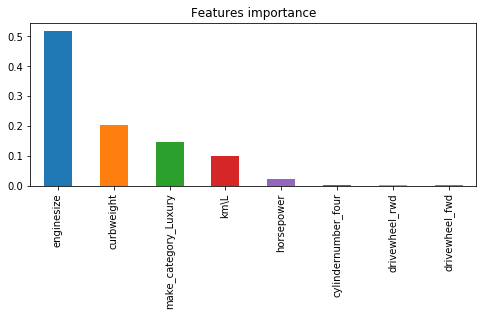

In [544]:
# plotting to get the most important ones
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
labels = X.columns[fet_ind]
pd.Series(fet_imp, index=labels).plot('bar', ax=ax)
ax.set_title('Features importance')

### If we now interpret the result then we can conclude the below- 

As from the above we can now cut down our important featues to - enginesize, curbweight, km\L, make_category_Luxury, carwidht, horsepower and carlenght

We had not taken carlength and carwidth into consideration because they are highly correlated to curbweight

Also curbweight is correlated to enginesize, horsepower but we have included all three because these are importan

# Now we have the feature importance, lets first build a simple linear regression model with enginesize

In [545]:
X = new_df[['enginesize']]
Y = new_df['price']
#fit
lm.fit(X,Y)
#prediction output
Yhat=lm.predict(X)
Yhat[0:5]

array([13795.34859997, 13795.34859997, 17484.71376062, 10273.68185571,
       14801.53909833])

In [546]:
#intercept(a)
lm.intercept_
#slope
lm.coef_
print('intercept is: %.3f'% lm.intercept_)
print('slope is: %.3f'% lm.coef_)

intercept is: 2224.158
slope is: 44440.080


In [547]:
# import RMSE matrix
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(Y, Yhat)
mse

14980261.405551314

In [548]:
import math
rmse= math.sqrt(mse)
rmse

3870.434265757696

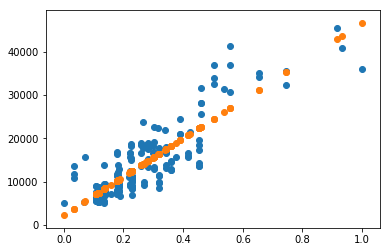

In [549]:
plt.scatter(new_df['enginesize'], new_df['price'])
plt.scatter(new_df['enginesize'], Yhat)

In [550]:
# we will also use Statsmodel to have a more deep look into the model parameters

target = new_df['price']
predictors=final_df['enginesize']
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.35e-65
Time:                        16:49:57   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2224.1579    509.458      4.366      0.0

# Now lets create a Multivariate Regression model using Randomforest

#### random forest is chosen as it does not get much effected with collinear features and variance in the dataset

In [551]:
# we will use the top 5 most important features

x_features = final_df[['enginesize', 'curbweight', 'km\L', 'make_category_Luxury', 'horsepower']]

# train and test - x and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_features,new_df['price'],test_size=0.3, random_state=42)

# import the RandomForest module
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

forest = RandomForestRegressor(n_estimators=200,
                               max_features='sqrt',
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=1)
forest.fit(X_train, y_train.squeeze())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [552]:
#calculate scores for the model

y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_preds)),
        np.sqrt(mean_squared_error(y_test, y_test_preds))))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 835.602, test: 2068.443
Random Forest R^2 train: 0.989, test: 0.938
